In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('Cleaned_Car_Details.csv')

def extract_torque_value(torque_str):
    if pd.isna(torque_str) or torque_str == 'Unknown':
        return np.nan
    for s in torque_str.split():
        s = s.replace(',', '').replace('@', '').replace('(', '').replace(')', '')
        try:
            return float(s)
        except ValueError:
            continue
    return np.nan

df['torque_value'] = df['torque'].apply(extract_torque_value)
df = df.drop('torque', axis=1)
df = df.dropna()

categorical_cols = ['fuel', 'transmission']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

features = ['year', 'mileage', 'engine', 'max_power', 'torque_value', 'seats', 'fuel', 'transmission']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
silhouette_scores = []
max_clusters = 10

Text(0, 0.5, 'WCSS')

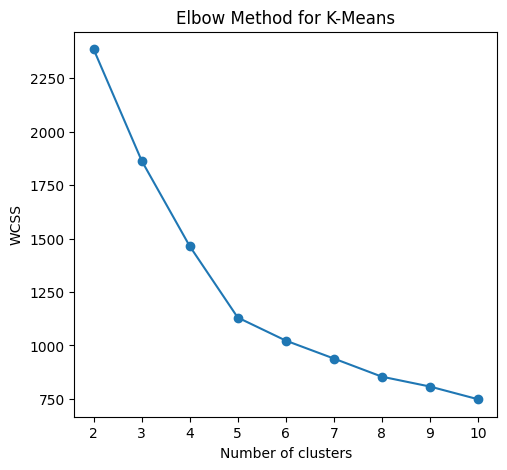

In [ ]:
for i in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters+1), wcss, marker='o')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

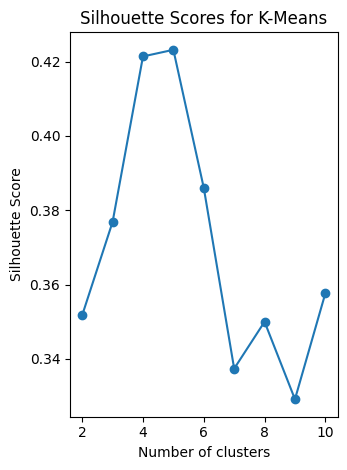

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.title('Silhouette Scores for K-Means')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

In [ ]:
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['kmeans_cluster'] = kmeans_labels

kmedoids = KMedoids(n_clusters=optimal_clusters, random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled)
df['kmedoids_cluster'] = kmedoids_labels

print("\nK-Mean value:", silhouette_score(X_scaled, kmeans_labels))
print("K-Medoids value:", silhouette_score(X_scaled, kmedoids_labels))



K-Mean value: 0.4213635589201953
K-Medoids value: 0.2494206531208654


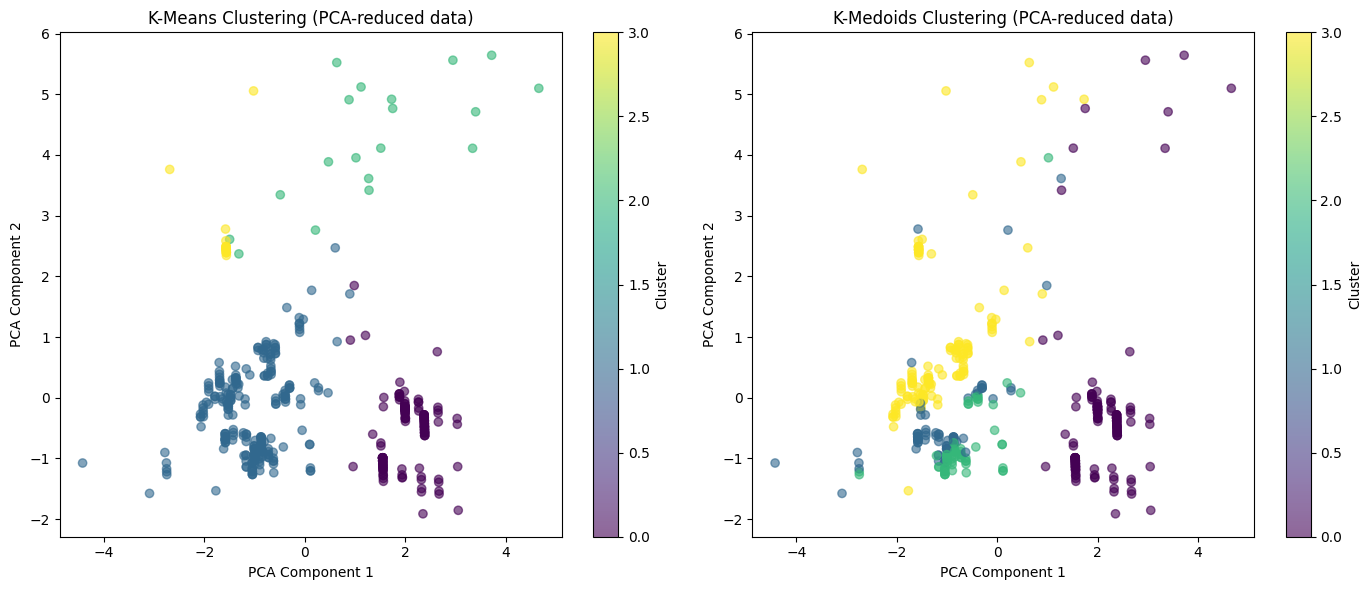

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering (PCA-reduced data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')

plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids_labels, cmap='viridis', alpha=0.6)
plt.title('K-Medoids Clustering (PCA-reduced data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')

plt.tight_layout()
plt.show()

In [ ]:
cluster_features = features + ['kmeans_cluster', 'kmedoids_cluster']

print("\nK-Means Cluster Characteristics:")
kmeans_cluster_stats = df[cluster_features].groupby('kmeans_cluster').mean()
print(kmeans_cluster_stats)

print("\nK-Medoids Cluster Characteristics:")
kmedoids_cluster_stats = df[cluster_features].groupby('kmedoids_cluster').mean()
print(kmedoids_cluster_stats)

df.to_csv('Clustered_Car_Details.csv', index=False)


K-Means Cluster Characteristics:
                       year    mileage       engine   max_power  torque_value  \
kmeans_cluster                                                                  
0               2008.969231  13.234615  2460.330769   91.966154     91.596923   
1               2008.369478  16.981727  1424.502008   81.472209     64.193173   
2               2009.526316  12.686842  2073.210526  152.113684     97.731579   
3               2010.588235  16.929412  1479.411765  116.352941   5165.364706   

                   seats      fuel  transmission  kmedoids_cluster  
kmeans_cluster                                                      
0               7.615385  1.015385      1.000000          0.007692  
1               5.008032  1.935743      1.000000          2.172691  
2               5.000000  1.947368      0.000000          1.473684  
3               5.000000  3.000000      0.941176          2.882353  

K-Medoids Cluster Characteristics:
                         year